In [20]:
# import sys
# !{sys.executable} -m pip install -r requirements.txt
# # !python --version
# # !python -m pip install -r requirements.txt
# print("requirements installed \n running program...")

In [21]:
import sys
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 
import matplotlib as plt

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os


# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns 

windows_dir = "../kaggle/all/"
ubuntu_dir = "/home/prof/kaggle/unbankedcredit/kaggle/all/"

import platform

system = platform.system()

print("Notebook is running on operating system: {}".format(system))
if system == "Linux":
    directory = ubuntu_dir
else:
    directory = windows_dir

Notebook is running on operating system: Linux


In [22]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    


In [23]:
# Training data
#Parse single row to find the column name and the data type
train_file = "/home/prof/kaggle/unbankedcredit/train_enhanced_loan_history_cc.csv"


def memory_reduction(data):
    dtypes = {}
    length_check = 0
    for column in data:
        length_check+=1
        
    integers = data.select_dtypes([int]) # select all columns of type integer eg 1
    floats = data.select_dtypes([float]) # select all columns of type float eg 1.0
    for inty in integers:
        dtypes[inty] = "int32" # set to 32 bit interger
    for floaty in floats:
        dtypes[floaty] = "float32" # set to 32 bit float
    
    if len(dtypes) != length_check:
        print("**********WARNING**********\n length check does not match.\n Likely contains non-float or non-int values")
    
    
    return dtypes
   
    


data = pd.read_csv(train_file, nrows=1)
for d in data:
    print(d)
dtype_dict = memory_reduction(data)



SK_ID_CURR
NAME_CONTRACT_TYPE
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APARTMENTS_MODE
BASEMENTAREA_MODE
YEARS_BEGINEXPLUATATION_MODE
YEARS_BUILD_MODE
COMMONAREA_MODE
ELEVATORS_MODE
ENTRANCES_MODE
FLOORSMAX_MODE
FLOORSMIN_MODE
LANDAREA_MODE
LIVIN

In [24]:
collist = ['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'ENTRANCES_MODE', 'LIVINGAPARTMENTS_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
           'ENTRANCES_MEDI', 'LIVINGAPARTMENTS_MEDI', 'FLAG_DOCUMENT_2','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_10', 
           'FLAG_DOCUMENT_12', 'NAME_INCOME_TYPE_Businessman', 'NAME_INCOME_TYPE_Student', 'ORGANIZATION_TYPE_Industry: type 6',
           'EXT_SOURCE_1_2_3_PRODUCT', 'EXT_SOURCE_1_3_PRODUCT', 'TARGET','ORGANIZATION_TYPE_Advertising', 'DAYS_CREDIT_mean', 
           'LIVINGAREA_MEDI', 'BASEMENTAREA_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 
           'LIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'ELEVATORS_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'ELEVATORS_MEDI', 
          ]        
           
#            FLAG_OWN_CAR
# FLAG_OWN_REALTY
# CNT_CHILDREN
# AMT_INCOME_TOTAL
# AMT_CREDIT
# AMT_ANNUITY
# AMT_GOODS_PRICE
# REGION_POPULATION_RELATIVE
# DAYS_BIRTH
# DAYS_EMPLOYED
# DAYS_REGISTRATION
# DAYS_ID_PUBLISH
# OWN_CAR_AGE
# FLAG_MOBIL
# FLAG_EMP_PHONE
# FLAG_WORK_PHONE
# FLAG_CONT_MOBILE
# FLAG_PHONE
# FLAG_EMAIL
# CNT_FAM_MEMBERS
# REGION_RATING_CLIENT
# REGION_RATING_CLIENT_W_CITY
# HOUR_APPR_PROCESS_START
# REG_REGION_NOT_LIVE_REGION
# REG_REGION_NOT_WORK_REGION
# LIVE_REGION_NOT_WORK_REGION
# REG_CITY_NOT_LIVE_CITY
# REG_CITY_NOT_WORK_CITY
# LIVE_CITY_NOT_WORK_CITY
# EXT_SOURCE_1
# EXT_SOURCE_2
# EXT_SOURCE_3
# APARTMENTS_AVG
# BASEMENTAREA_AVG
# YEARS_BEGINEXPLUATATION_AVG
# YEARS_BUILD_AVG
# COMMONAREA_AVG
# ELEVATORS_AVG
# ENTRANCES_AVG
# FLOORSMAX_AVG
# FLOORSMIN_AVG
# LANDAREA_AVG
# LIVINGAPARTMENTS_AVG
# LIVINGAREA_AVG
# NONLIVINGAPARTMENTS_AVG
# NONLIVINGAREA_AVG
# APARTMENTS_MODE
# BASEMENTAREA_MODE
# YEARS_BEGINEXPLUATATION_MODE
# YEARS_BUILD_MODE
# COMMONAREA_MODE
# ELEVATORS_MODE
# ENTRANCES_MODE
# FLOORSMAX_MODE
# FLOORSMIN_MODE
# LANDAREA_MODE
# LIVINGAPARTMENTS_MODE
# LIVINGAREA_MODE
# NONLIVINGAPARTMENTS_MODE
# NONLIVINGAREA_MODE
# APARTMENTS_MEDI
# BASEMENTAREA_MEDI
# YEARS_BEGINEXPLUATATION_MEDI
# YEARS_BUILD_MEDI
# COMMONAREA_MEDI
# ELEVATORS_MEDI
# ENTRANCES_MEDI
# FLOORSMAX_MEDI
# FLOORSMIN_MEDI
# LANDAREA_MEDI
# LIVINGAPARTMENTS_MEDI
# LIVINGAREA_MEDI
# NONLIVINGAPARTMENTS_MEDI
# NONLIVINGAREA_MEDI
# TOTALAREA_MODE
# OBS_30_CNT_SOCIAL_CIRCLE
# DEF_30_CNT_SOCIAL_CIRCLE
# OBS_60_CNT_SOCIAL_CIRCLE
# DEF_60_CNT_SOCIAL_CIRCLE
# DAYS_LAST_PHONE_CHANGE
# FLAG_DOCUMENT_2
# FLAG_DOCUMENT_3
# FLAG_DOCUMENT_4
# FLAG_DOCUMENT_5
# FLAG_DOCUMENT_6
# FLAG_DOCUMENT_7
# FLAG_DOCUMENT_8
# FLAG_DOCUMENT_9
# FLAG_DOCUMENT_10
# FLAG_DOCUMENT_11
# FLAG_DOCUMENT_12
# FLAG_DOCUMENT_13
# FLAG_DOCUMENT_14
# FLAG_DOCUMENT_15
# FLAG_DOCUMENT_16
# FLAG_DOCUMENT_17
# FLAG_DOCUMENT_18
# FLAG_DOCUMENT_19
# FLAG_DOCUMENT_20
# FLAG_DOCUMENT_21
# AMT_REQ_CREDIT_BUREAU_HOUR
# AMT_REQ_CREDIT_BUREAU_DAY
# AMT_REQ_CREDIT_BUREAU_WEEK
# AMT_REQ_CREDIT_BUREAU_MON
# AMT_REQ_CREDIT_BUREAU_QRT
# AMT_REQ_CREDIT_BUREAU_YEAR
# CODE_GENDER_F
# CODE_GENDER_M
# NAME_TYPE_SUITE_Children
# NAME_TYPE_SUITE_Family
# NAME_TYPE_SUITE_Group of people
# NAME_TYPE_SUITE_Other_A
# NAME_TYPE_SUITE_Other_B
# NAME_TYPE_SUITE_Spouse, partner
# NAME_TYPE_SUITE_Unaccompanied
# NAME_INCOME_TYPE_Businessman
# NAME_INCOME_TYPE_Commercial associate
# NAME_INCOME_TYPE_Pensioner
# NAME_INCOME_TYPE_State servant
# NAME_INCOME_TYPE_Student
# NAME_INCOME_TYPE_Unemployed
# NAME_INCOME_TYPE_Working
# NAME_EDUCATION_TYPE_Academic degree
# NAME_EDUCATION_TYPE_Higher education
# NAME_EDUCATION_TYPE_Incomplete higher
# NAME_EDUCATION_TYPE_Lower secondary
# NAME_EDUCATION_TYPE_Secondary / secondary special
# NAME_FAMILY_STATUS_Civil marriage
# NAME_FAMILY_STATUS_Married
# NAME_FAMILY_STATUS_Separated
# NAME_FAMILY_STATUS_Single / not married
# NAME_FAMILY_STATUS_Widow
# NAME_HOUSING_TYPE_Co-op apartment
# NAME_HOUSING_TYPE_House / apartment
# NAME_HOUSING_TYPE_Municipal apartment
# NAME_HOUSING_TYPE_Office apartment
# NAME_HOUSING_TYPE_Rented apartment
# NAME_HOUSING_TYPE_With parents
# OCCUPATION_TYPE_Accountants
# OCCUPATION_TYPE_Cleaning staff
# OCCUPATION_TYPE_Cooking staff
# OCCUPATION_TYPE_Core staff
# OCCUPATION_TYPE_Drivers
# OCCUPATION_TYPE_HR staff
# OCCUPATION_TYPE_High skill tech staff
# OCCUPATION_TYPE_IT staff
# OCCUPATION_TYPE_Laborers
# OCCUPATION_TYPE_Low-skill Laborers
# OCCUPATION_TYPE_Managers
# OCCUPATION_TYPE_Medicine staff
# OCCUPATION_TYPE_Private service staff
# OCCUPATION_TYPE_Realty agents
# OCCUPATION_TYPE_Sales staff
# OCCUPATION_TYPE_Secretaries
# OCCUPATION_TYPE_Security staff
# OCCUPATION_TYPE_Waiters/barmen staff
# WEEKDAY_APPR_PROCESS_START_FRIDAY
# WEEKDAY_APPR_PROCESS_START_MONDAY
# WEEKDAY_APPR_PROCESS_START_SATURDAY
# WEEKDAY_APPR_PROCESS_START_SUNDAY
# WEEKDAY_APPR_PROCESS_START_THURSDAY
# WEEKDAY_APPR_PROCESS_START_TUESDAY
# WEEKDAY_APPR_PROCESS_START_WEDNESDAY
# ORGANIZATION_TYPE_Advertising
# ORGANIZATION_TYPE_Agriculture
# ORGANIZATION_TYPE_Bank
# ORGANIZATION_TYPE_Business Entity Type 1
# ORGANIZATION_TYPE_Business Entity Type 2
# ORGANIZATION_TYPE_Business Entity Type 3
# ORGANIZATION_TYPE_Cleaning
# ORGANIZATION_TYPE_Construction
# ORGANIZATION_TYPE_Culture
# ORGANIZATION_TYPE_Electricity
# ORGANIZATION_TYPE_Emergency
# ORGANIZATION_TYPE_Government
# ORGANIZATION_TYPE_Hotel
# ORGANIZATION_TYPE_Housing
# ORGANIZATION_TYPE_Industry: type 1
# ORGANIZATION_TYPE_Industry: type 10
# ORGANIZATION_TYPE_Industry: type 11
# ORGANIZATION_TYPE_Industry: type 12
# ORGANIZATION_TYPE_Industry: type 13
# ORGANIZATION_TYPE_Industry: type 2
# ORGANIZATION_TYPE_Industry: type 3
# ORGANIZATION_TYPE_Industry: type 4
# ORGANIZATION_TYPE_Industry: type 5
# ORGANIZATION_TYPE_Industry: type 6
# ORGANIZATION_TYPE_Industry: type 7
# ORGANIZATION_TYPE_Industry: type 8
# ORGANIZATION_TYPE_Industry: type 9
# ORGANIZATION_TYPE_Insurance
# ORGANIZATION_TYPE_Kindergarten
# ORGANIZATION_TYPE_Legal Services
# ORGANIZATION_TYPE_Medicine
# ORGANIZATION_TYPE_Military
# ORGANIZATION_TYPE_Mobile
# ORGANIZATION_TYPE_Other
# ORGANIZATION_TYPE_Police
# ORGANIZATION_TYPE_Postal
# ORGANIZATION_TYPE_Realtor
# ORGANIZATION_TYPE_Religion
# ORGANIZATION_TYPE_Restaurant
# ORGANIZATION_TYPE_School
# ORGANIZATION_TYPE_Security
# ORGANIZATION_TYPE_Security Ministries
# ORGANIZATION_TYPE_Self-employed
# ORGANIZATION_TYPE_Services
# ORGANIZATION_TYPE_Telecom
# ORGANIZATION_TYPE_Trade: type 1
# ORGANIZATION_TYPE_Trade: type 2
# ORGANIZATION_TYPE_Trade: type 3
# ORGANIZATION_TYPE_Trade: type 4
# ORGANIZATION_TYPE_Trade: type 5
# ORGANIZATION_TYPE_Trade: type 6
# ORGANIZATION_TYPE_Trade: type 7
# ORGANIZATION_TYPE_Transport: type 1
# ORGANIZATION_TYPE_Transport: type 2
# ORGANIZATION_TYPE_Transport: type 3
# ORGANIZATION_TYPE_Transport: type 4
# ORGANIZATION_TYPE_University
# FONDKAPREMONT_MODE_not specified
# FONDKAPREMONT_MODE_org spec account
# FONDKAPREMONT_MODE_reg oper account
# FONDKAPREMONT_MODE_reg oper spec account
# HOUSETYPE_MODE_block of flats
# HOUSETYPE_MODE_specific housing
# HOUSETYPE_MODE_terraced house
# WALLSMATERIAL_MODE_Block
# WALLSMATERIAL_MODE_Mixed
# WALLSMATERIAL_MODE_Monolithic
# WALLSMATERIAL_MODE_Others
# WALLSMATERIAL_MODE_Panel
# WALLSMATERIAL_MODE_Stone, brick
# WALLSMATERIAL_MODE_Wooden
# EMERGENCYSTATE_MODE_No
# EMERGENCYSTATE_MODE_Yes
# TARGET
# DAYS_EMPLOYED_ANOM
# EXT_SOURCE_1_2_3_PRODUCT
# EXT_SOURCE_1_3_PRODUCT
# EXT_SOURCE_1_3_ADD
# INCOME_RATIO
# TOTAL_OUTSTANDING_DEBT
# SK_ID_BUREAU_sum
# DAYS_CREDIT_sum
# CREDIT_DAY_OVERDUE_sum
# DAYS_CREDIT_ENDDATE_sum
# DAYS_ENDDATE_FACT_sum
# AMT_CREDIT_MAX_OVERDUE_sum
# CNT_CREDIT_PROLONG_sum
# AMT_CREDIT_SUM_sum
# AMT_CREDIT_SUM_DEBT_sum
# AMT_CREDIT_SUM_LIMIT_sum
# AMT_CREDIT_SUM_OVERDUE_sum
# DAYS_CREDIT_UPDATE_sum
# AMT_ANNUITY_sum
# SK_ID_BUREAU_mean
# DAYS_CREDIT_mean
# CREDIT_DAY_OVERDUE_mean
# DAYS_CREDIT_ENDDATE_mean
# DAYS_ENDDATE_FACT_mean
# AMT_CREDIT_MAX_OVERDUE_mean
# CNT_CREDIT_PROLONG_mean
# AMT_CREDIT_SUM_mean
# AMT_CREDIT_SUM_DEBT_mean
# AMT_CREDIT_SUM_LIMIT_mean
# AMT_CREDIT_SUM_OVERDUE_mean
# DAYS_CREDIT_UPDATE_mean
# AMT_ANNUITY_mean
# SK_ID_PREV
# NUM_INSTALMENT_VERSION
# NUM_INSTALMENT_NUMBER
# DAYS_INSTALMENT
# DAYS_ENTRY_PAYMENT
# AMT_INSTALMENT
# AMT_PAYMENT
# DAYS_IN_ADVANCE
# AMT_UNDERPAYMENT', EXT_SOURCE_2'']

In [25]:
# train_file = "/home/prof/kaggle/unbankedcredit/train_enhanced_loan_history.csv"
# train_pd = pd.read_csv(train_file, low_memory=True, chunksize=100000, dtype=dtype_dict, usecols=collist)
train_pd = pd.read_csv(train_file, low_memory=True, dtype=dtype_dict)
train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 335 entries, SK_ID_CURR to CC_COUNT
dtypes: bool(1), float32(161), int32(173)
memory usage: 392.1 MB


In [26]:
for x in train_pd:
    print(x)
    

SK_ID_CURR
NAME_CONTRACT_TYPE
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APARTMENTS_MODE
BASEMENTAREA_MODE
YEARS_BEGINEXPLUATATION_MODE
YEARS_BUILD_MODE
COMMONAREA_MODE
ELEVATORS_MODE
ENTRANCES_MODE
FLOORSMAX_MODE
FLOORSMIN_MODE
LANDAREA_MODE
LIVIN

Need to downcast data to smallest number of bits as large dataset is creating memory issues

In [27]:
# Test data
test_file = "/home/prof/kaggle/unbankedcredit/test_enhanced_loan_history_cc.csv"
collist.remove('TARGET')
# test_pd = pd.read_csv(test_file, usecols=collist)
test_pd = pd.read_csv(test_file)
print('Training data shape: ', test_pd.shape)
test_pd.info()

Training data shape:  (48744, 334)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 334 entries, SK_ID_CURR to CC_COUNT
dtypes: bool(1), float64(161), int64(172)
memory usage: 123.9 MB


In [28]:
train_data = train_pd
# # train_data = train_pd[['SK_ID_CURR','AMT_INCOME_TOTAL', 'TARGET', 'EXT_SOURCE_1_2_3_PRODUCT', 'TOTAL_OUTSTANDING_DEBT' ]]
# i = 0
# train_data = pd.DataFrame()

# # import 10 chunks for training

# for chunk in train_pd:
#     if i > 1:
#         break
#     else:
#         train_data = pd.concat([train_data, chunk])
#         i+=1
    
    

# # train_data = train_pd[te]

In [29]:
train_data.head(5).mean()

SK_ID_CURR                              1.000044e+05
NAME_CONTRACT_TYPE                      2.000000e-01
FLAG_OWN_CAR                            2.000000e-01
FLAG_OWN_REALTY                         8.000000e-01
CNT_CHILDREN                            0.000000e+00
AMT_INCOME_TOTAL                        1.593000e+05
AMT_CREDIT                              5.321565e+05
AMT_ANNUITY                             2.374020e+04
AMT_GOODS_PRICE                         4.851000e+05
REGION_POPULATION_RELATIVE              1.381120e-02
DAYS_BIRTH                             -1.684180e+04
DAYS_EMPLOYED                          -1.625400e+03
DAYS_REGISTRATION                      -4.647600e+03
DAYS_ID_PUBLISH                        -2.167400e+03
OWN_CAR_AGE                             2.600000e+01
FLAG_MOBIL                              1.000000e+00
FLAG_EMP_PHONE                          1.000000e+00
FLAG_WORK_PHONE                         2.000000e-01
FLAG_CONT_MOBILE                        1.0000

In [30]:
# test_data = test_pd[['SK_ID_CURR','AMT_INCOME_TOTAL', 'EXT_SOURCE_1_2_3_PRODUCT', 'TOTAL_OUTSTANDING_DEBT' ]]
test_data = test_pd

In [31]:
features = 0
for c in train_data:
    features +=1
print("number of features is {}".format(features))

number of features is 335


In [32]:
# from sklearn import preprocessing 
# Y_imputed=preprocessing.Imputer().fit_transform(test_data) 
# Y_imputed.shape

In [33]:
from sklearn.preprocessing import MinMaxScaler, Imputer

train_labels = train_data['TARGET']

# Drop the target from the training data
if 'TARGET' in train_data:
    train = train_data.drop(columns = ['TARGET'])
else:
    train = train_data.copy()
    
# Feature names
features = list(train_data.columns)

# Copy of the testing data
test = test_data.copy()

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train_model = imputer.transform(train)
test_model = imputer.transform(test)


# Repeat with the scaler
scaler.fit(train_model)
s_train = scaler.transform(train_model)
s_test = scaler.transform(test_model)

print('Training data shape: ', s_train.shape)
print('Testing data shape: ', s_test.shape)

Training data shape:  (307511, 334)
Testing data shape:  (48744, 334)


In [34]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001, class_weight="balanced") # balancing class weights as data is highly unbalanced between defaults and payers

# Train on the training data
log_reg.fit(s_train, train_labels)

LogisticRegression(C=0.0001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [35]:
log_reg.score(s_train, train_labels)

0.6615210512794665

In [36]:
# Make predictions
# Make sure to select the second column only
log_reg_train_pred = log_reg.predict(s_train)


Confusion matrix, without normalization
[[186828  95858]
 [  8228  16597]]
Normalized confusion matrix
[[0.66 0.34]
 [0.33 0.67]]


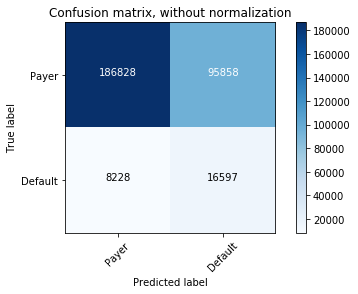

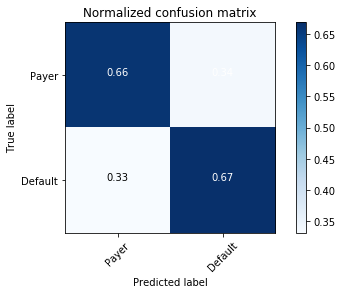

In [37]:
class_names = ["Payer", "Default"]

# Compute confusion matrix
cnf_matrix = confusion_matrix(train_labels,log_reg_train_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

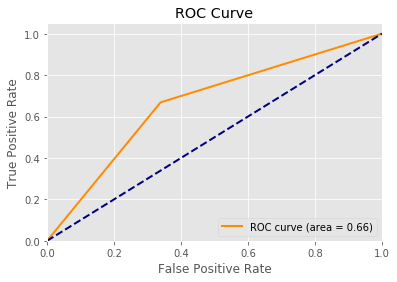

In [38]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# y_predict_probabilities = clf.predict(X_test)[:,1]

fpr, tpr, _ = roc_curve(train_labels, log_reg_train_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [39]:
log_reg_pred = log_reg.predict_proba(s_test)[:, 1]

In [40]:
# Submission dataframe
submit = test_data[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
submit

,SK_ID_CURR,TARGET
0,100001,0.401205
1,100005,0.652833
2,100013,0.344923
3,100028,0.397902
4,100038,0.610731
5,100042,0.294621
6,100057,0.395668
7,100065,0.560510
8,100066,0.265002
9,100067,0.540106


In [42]:
# Save the submission to a csv file
submit.to_csv('log_reg_baseline_with_credit_product_history_enhanced.csv', index = False)

In [43]:
# X = train_model # training data without scaler
X = s_train # training data with scaler
y = train_labels

In [44]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification

clf = LinearSVC(random_state=0)
clf.fit(X, y)
LinearSVC(C = 0.0001, class_weight="balanced", dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=1000, tol=0.0001,
     verbose=0)
# print(clf.coef_)
# print(clf.intercept_)



LinearSVC(C=0.0001, class_weight='balanced', dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=1000, tol=0.0001,
     verbose=0)

In [45]:
clf.score(X,y)

0.9192744324593266

In [46]:
predictions = clf.decision_function(s_test)

In [47]:
predict = clf.predict(X)

Confusion matrix, without normalization
[[282679      7]
 [ 24817      8]]
Normalized confusion matrix
[[1.00e+00 2.48e-05]
 [1.00e+00 3.22e-04]]


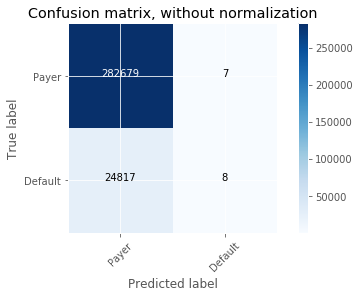

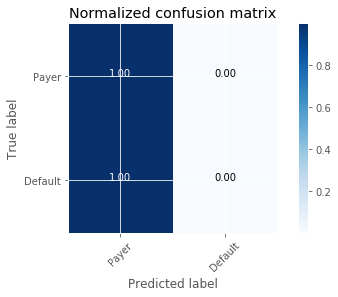

In [48]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y,predict)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

ROC Curve

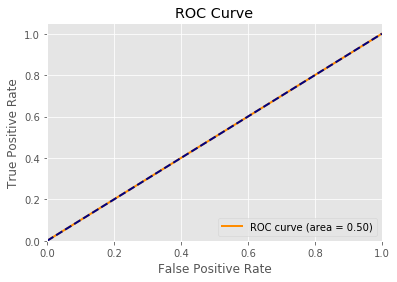

In [49]:
# y_predict_probabilities = clf.predict(X_test)[:,1]

fpr, tpr, _ = roc_curve(y, predict)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [50]:
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

In [51]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

def model(features, test_features, encoding = 'ohe', n_folds = 5):
    
    """Train and test a light gradient boosting model using
    cross validation. 
    
    Parameters
    --------
        features (pd.DataFrame): 
            dataframe of training features to use 
            for training a model. Must include the TARGET column.
        test_features (pd.DataFrame): 
            dataframe of testing features to use
            for making predictions with the model. 
        encoding (str, default = 'ohe'): 
            method for encoding categorical variables. Either 'ohe' for one-hot encoding or 'le' for integer label encoding
            n_folds (int, default = 5): number of folds to use for cross validation
        
    Return
    --------
        submission (pd.DataFrame): 
            dataframe with `SK_ID_CURR` and `TARGET` probabilities
            predicted by the model.
        feature_importances (pd.DataFrame): 
            dataframe with the feature importances from the model.
        valid_metrics (pd.DataFrame): 
            dataframe with training and validation metrics (ROC AUC) for each fold and overall.
        
    """
    
    # Extract the ids
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    # Extract the labels for training
    labels = features['TARGET']
    
    # Remove the ids and target
    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])
    
    
    # One Hot Encoding
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)
        
        # Align the dataframes by the columns
        features, test_features = features.align(test_features, join = 'inner', axis = 1)
        
        # No categorical indices to record
        cat_indices = 'auto'
    
    # Integer label encoding
    elif encoding == 'le':
        
        # Create a label encoder
        label_encoder = LabelEncoder()
        
        # List for storing categorical indices
        cat_indices = []
        
        # Iterate through each column
        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                # Map the categorical features to integers
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))

                # Record the categorical indices
                cat_indices.append(i)
    
    # Catch error if label encoding scheme is not valid
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")
        
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    # Extract feature names
    feature_names = list(features.columns)
    
    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)
    
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # Create the model
        model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                  early_stopping_rounds = 1000, verbose = 200)
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # Make predictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics



In [52]:
submission, fi, metrics = model(train_data, test_data)
print('Baseline metrics')
print(metrics)

Training Data Shape:  (307511, 333)
Testing Data Shape:  (48744, 333)
Training until validation scores don't improve for 1000 rounds.
[200]	valid's auc: 0.769346	train's auc: 0.817708
[400]	valid's auc: 0.769143	train's auc: 0.850794
[600]	valid's auc: 0.768313	train's auc: 0.876738
[800]	valid's auc: 0.76729	train's auc: 0.89756
[1000]	valid's auc: 0.765197	train's auc: 0.914798
[1200]	valid's auc: 0.763338	train's auc: 0.928776
Early stopping, best iteration is:
[283]	valid's auc: 0.769784	train's auc: 0.832715
Training until validation scores don't improve for 1000 rounds.
[200]	valid's auc: 0.771571	train's auc: 0.817554
[400]	valid's auc: 0.771898	train's auc: 0.851244
[600]	valid's auc: 0.770209	train's auc: 0.876991
[800]	valid's auc: 0.767708	train's auc: 0.897569
[1000]	valid's auc: 0.765531	train's auc: 0.914319
[1200]	valid's auc: 0.76312	train's auc: 0.928126
Early stopping, best iteration is:
[334]	valid's auc: 0.772411	train's auc: 0.841319
Training until validation score

In [54]:
submission.to_csv('enhanced_history_cc_lgb1.csv', index = False)